# Exercise 3: Interatomic potentials

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import sympy as sp

# a) Interatomic potential shape

Sketch a typical interatomic potential (energy as a function of interatomic distance $r$) and explain your choices. What are the key contributions to this potential? In particular, what is the behavior as $r \to 0$ and $r \to +\infty$?

## Solution

See the Stillinger-Weber shape. For $r \to 0$ the repulsive component wins and it becomes very energetically expensive for atoms to be too close. It needs to have one minimum, which corrisponds to the equilibrium interatomic distance. For $r \to  +\infty$ it needs to go smoothly to zero, when the atoms are too far apart the interaction becomes negligible.

A typical interatomic potential incorporates two key physical contributions:

1. Short-range repulsion (dominant as $r \to 0$):
   At very small interatomic distances, the potential energy becomes strongly positive due to the overlap of electron clouds, which is prohibited by the Pauli exclusion principle. This repulsive interaction is commonly modeled in different forms across potential functions. For example:

   * In the Lennard-Jones potential the repulsion is represented by a steeply rising $\left(1/r\right)^{12}$ term.
   * In the Morse potential, the repulsion is captured by the exponential term $e^{-2a(r - r_e)}$, where $a$ is a measure of bond stiffness and $r_e$ is the equilibrium bond distance.
   * More sophisticated potentials, such as the Born-Mayer or Buckingham potentials, also use exponential or modified inverse power forms for short-range repulsion.

2. Long-range attraction (dominant as $r \to \infty$):
   At larger distances, the potential is dominated by attractive van der Waals (dispersion) interactions, which arise from correlated fluctuations of instantaneous dipoles. These are typically modeled by terms that decay as $-1/r^6$. For example:

   * The Lennard-Jones potential includes a $-\left(1/r\right)^6$ term to represent dispersion forces.
   * The Morse potential includes an attractive term of the form $-2e^{-a(r - r_e)}$, which smoothly approaches zero as $r \to \infty$.
   * In more complex models like the London dispersion potential, the attraction can also include higher-order multipole contributions depending on the system.

These two competing effects (strong short-range repulsion and weaker long-range attraction) together create a potential well with a minimum at an intermediate equilibrium distance, corresponding to the most stable atomic separation.

## Stillinger-Weber (SW) potential for Si

The **Stillinger–Weber (SW) potential** for silicon was the first practical cluster potential to reproduce the **diamond cubic structure** as the most stable configuration. It captures not only the correct equilibrium bond lengths and angles but also accurately reflects the **energetic cost of distorting** the tetrahedral geometry, making it a foundational model for covalent systems.

---

### Stillinger–Weber Potential

Originally designed for **silicon**, the Stillinger–Weber potential uses the form:

#### Two-body term:
$$
\phi_2(r) = A \varepsilon \left[ B \left( \frac{\sigma}{r} \right)^p - \left( \frac{\sigma}{r} \right)^q \right] \exp\left( \frac{\sigma}{r - a\sigma} \right)
$$

The exponential function is added to introduce a cutoff radius ($r_{cut}$) while mantaining the function smooth and continuous.

#### Three-body term:
$$
\phi_3(r_{ij}, r_{ik}, \theta) = \lambda \varepsilon \left[ \cos \theta - \cos \theta_0 \right]^2 \exp\left( \frac{\gamma \sigma}{r_{ij} - a\sigma} \right) \exp\left( \frac{\gamma \sigma}{r_{ik} - a\sigma} \right)
$$

- $r_{ij}, r_{ik}$ are pair distances
- $\theta$ is the angle $\angle jik$
- $\cos \theta_0$ defines the preferred bond angle (e.g., tetrahedral for silicon)

The **three-body term** contains an angular component of the form:

$$
\left( \cos \theta_{jik} + \frac{1}{3} \right)^2
$$

This function is minimized when $\cos \theta = -\frac{1}{3}$, corresponding to the **tetrahedral angle** $\theta \approx 109.47^\circ$. As a result, the potential energetically favors tetrahedral coordination and stabilizes the **diamond cubic lattice** found in silicon.

The original parameters determined by Stillinger and Weber are:

| Parameter | Value        | Unit |
|-----------|--------------|------|
| $\sigma$     | 2.0951       | $\mathrm{\AA}$    |
| $\varepsilon$   | 2.1682       | eV   |
| A         | 7.049556277  | —    |
| B         | 0.6022245584 | —    |
| p         | 4            | —    |
| q         | 0            | —    |
| a         | 1.8          | —    |
| $\lambda$ | 21.0          | - |
| $\mu$ | 1.2          | - |


### Only two-body term:
Assuming ideal bond angles, **we restrict our model to the two-body interaction term**.  

Let's plot it and see what it looks like.

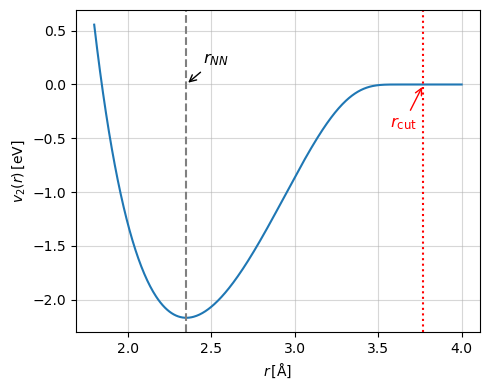

In [77]:
# SW potential parameters
A = 7.049556277
B = 0.6022245584
p = 4
q = 0
a = 1.8 
sigma = 2.0951  # Ångstroms
epsilon = 2.1682  # eV

# Define v2(r)
def v2_real_func(r):
    r_red = r / sigma
    if r >= a * sigma:
        return 0.0
    return epsilon * A * (B * r_red**(-p) - r_red**(-q)) * np.exp(1 / (r_red - a))

# Compute data
r_vals_real = np.linspace(1.8, 4.0, 500)
v2_vals = [v2_real_func(r) for r in r_vals_real]

# Important distances
r_NN = 2.35
r_2NN = 3.84
r_cut = a * sigma

# Plot
plt.figure(figsize=(5, 4))
plt.plot(r_vals_real, v2_vals, color='tab:blue')

# Vertical lines
plt.axvline(x=r_NN, color='gray', linestyle='--')
plt.axvline(x=r_cut, color='red', linestyle=':')

# Annotations
plt.annotate(r'$r_{NN}$', xy=(r_NN, 0), xytext=(r_NN + 0.1, 0.2),
             arrowprops=dict(arrowstyle='->'), fontsize=12)

plt.annotate(fr'$r_{{\mathrm{{cut}}}}$', 
             xy=(r_cut, 0), xytext=(r_cut - 0.2, -0.4),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red')

# Axes
plt.xlabel(r'$r\,\mathrm{[\AA]}$')
plt.ylabel(r'$v_2(r)\,\mathrm{[eV]}$')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# b) Parameters and Force
- What is the relationship between the parameter $\varepsilon$ and the depth of the potential well? Illustrate qualitatively how the shape of the potential changes as 
$\varepsilon$ varies.  
  -  Hint: You can change `epsilon` in the code snipped and see how the plot changes.

- Given the shape of the two-body term in the Stillinger-Weber potential, sketch the corresponding force $F(r)$ as a function of distance $r$. What is the relationship between force and potential?

## Solution: See force plot below

### Force calculation
We compute the gradient of the potential to find the force between atoms $i$ and $j$

$$
\begin{align*}
- \nabla_{\mathbf{r}_i} v_2(r_{ij}) 
&= - \frac{\partial}{\partial \mathbf{r}_i} \left\{ \epsilon A \left( B r_{ij}^{-p} - r_{ij}^{-q} \right) \exp \left[ \left( r_{ij} - a \right)^{-1} \right] \right\} \\
&= - \epsilon A \frac{\mathbf{r}_{ij}}{r_{ij}} \left( \left[ \frac{\partial}{\partial r} \left( B r^{-p} - r^{-q} \right) \right] \bigg|_{r_{ij}} \exp \left[ \left( r_{ij} - a \right)^{-1} \right] \right. \\
&\quad + \left. \left( B r_{ij}^{-p} - r_{ij}^{-q} \right) \left\{ \frac{\partial}{\partial r} \exp \left[ (r - a)^{-1} \right] \right\} \bigg|_{r_{ij}} \right) \\
&= - \epsilon A \frac{\mathbf{r}_{ij}}{r_{ij}} \left\{ \left( -p B r_{ij}^{-p-1} + q r_{ij}^{-q-1} \right) \exp \left[ (r_{ij} - a)^{-1} \right] \right. \\
&\quad - \left. \left( B r_{ij}^{-p} - r_{ij}^{-q} \right) \exp \left[ (r_{ij} - a)^{-1} \right] (r_{ij} - a)^{-2} \right\} \\
&= v_2 \frac{\mathbf{r}_{ij}}{r_{ij}} \left[ \frac{p B r_{ij}^{-p-1} - q r_{ij}^{-q-1}}{B r_{ij}^{-p} - r_{ij}^{-q}} + (r_{ij} - a)^{-2} \right] \\
&\equiv \mathbf{f}_{ij}
\end{align*}
$$

By setting the interatomic force to zero, we find $r_{ij}$ at which the potential reaches a minimum. This distance corresponds to the equilibrium bond length between first neighbors. We can solve this numerically with the following code:

In [22]:
# Define numerical derivative: force = -dv2/dr
def force_real_func(r, h=1e-6):
    return -(v2_real_func(r + h) - v2_real_func(r - h)) / (2 * h)

# Use minimize_scalar on |force| to find the root of the force
force_root_result = minimize_scalar(lambda r: abs(force_real_func(r)),
                                    bounds=(2.0, a * sigma - 1e-4),
                                    method='bounded')

print(force_root_result.x if force_root_result.success else None)

2.3516714010669038


We find:

$r_{NN} = 2.3517 \AA$

Which fits with the experimental value of $2.35\,\mathrm{\AA}$. This means that the potentail has been fitted well and can reproduce this basic property for Silicon.

### Plot the force
Use Python and matplolib to plot the force as a function of the interatomic distance $r$. The force is computed by the function `force_real_func` in the cell above.

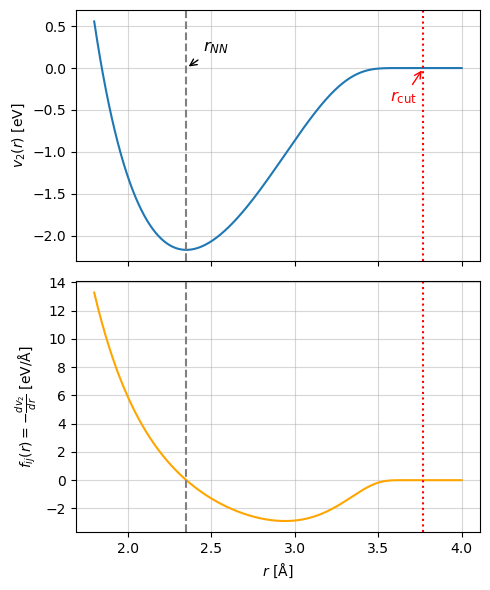

In [75]:
# Solution for b)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 6))

r_vals_real = np.linspace(1.8, 4, 500)
v2_vals = [v2_real_func(r) for r in r_vals_real]
force_vals = [force_real_func(r) for r in r_vals_real]


ax1.plot(r_vals_real, v2_vals)
ax1.axvline(x=2.35, color='gray', linestyle='--')
ax1.axvline(x=a * sigma, color='red', linestyle=':')
# Annotations
ax1.annotate(r'$r_{NN}$', xy=(r_NN, 0), xytext=(r_NN + 0.1, 0.2),
             arrowprops=dict(arrowstyle='->'), fontsize=12)

ax1.annotate(fr'$r_{{\mathrm{{cut}}}}$', 
             xy=(r_cut, 0), xytext=(r_cut - 0.2, -0.4),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red')
ax1.set_ylabel(r'$v_2(r)\ \mathrm{[eV]}$')

ax1.grid(alpha=0.5)


# Plot force with LaTeX labels
ax2.plot(r_vals_real, force_vals, color='orange')
ax2.axvline(x=2.35, color='gray', linestyle='--')
ax2.axvline(x=a * sigma, color='red', linestyle=':')
ax2.set_xlabel(r'$r\ \mathrm{[\AA]}$')
ax2.set_ylabel(r'$f_{ij}(r) = -\frac{dv_2}{dr}\ \mathrm{[eV/\AA]}$')
ax2.grid(alpha=0.5)

plt.tight_layout()
plt.show()

# c) Lattice constant 

Use the nearest-neighbor distance to calculate the lattice constant, taking into account the crystal structure of silicon.

## Solution

Silicon crystallizes in a **diamond cubic** structure, which is a face-centered cubic (FCC) lattice with a 2-atom basis.

* In this structure, the **nearest-neighbor atoms** are along the body diagonals.
* The **NN distance** corresponds to:

  $$
  r_{\text{NN}} = \frac{\sqrt{3}}{4} a
  $$

  where $a$ is the **lattice constant**.


Solve for $a$:

$$
a = \frac{4}{\sqrt{3}} \approx 5.431\ \mathrm{\AA}
$$

# d) Compute energy per atom

Compute the energy per atom by considering only first-neighbor interactions and neglecting any angular (directional bonding) contributions.

## Solution

### Energy per atom using $v_2(r)$

We'll compute the **energy per atom** by summing up the pairwise potential contributions from **all neighbors**, using the fact that:

$$
E_{\text{atom}} = \frac{1}{2} \sum_j v_2(r_{ij})
$$

The factor of ½ avoids double-counting since each interaction is shared between two atoms.

$$
E_{\text{atom}} = \frac{1}{2} \sum_{j=1}^{4} v_2(r_{ij}) = 2 \cdot v_2(r_{\text{NN}})
$$


The **two-body energy per atom** in the diamond structure of silicon, using the Stillinger–Weber potential and including only first-neighbor interactions, is:

$$
\boxed{E_{\text{atom}}^{(2)} \approx -4.34\ \mathrm{eV}}
$$

This is quite close to the known cohesive energy of silicon (\~4.63 eV/atom), especially considering we only included the two-body term and just the 4 nearest neighbors.

### Equation of state

From this, we can compute the equation of state $E(V)$ by calculating how the total energy per atom changes with volume per atom.

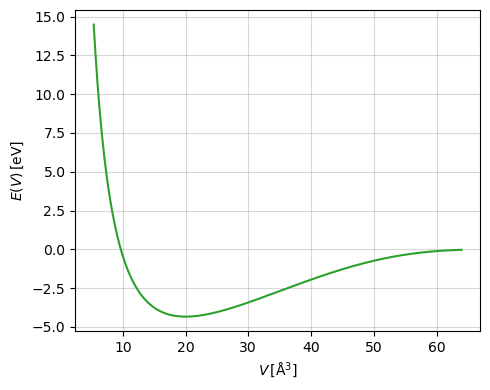

In [74]:
def energy_per_atom(a0):
    r_NN = (np.sqrt(3) / 4) * a0
    v = v2_real_func(r_NN)
    z = 4  # 4 NN per atom in diamond cubic
    return 0.5 * z * v  # factor 0.5 to avoid double-counting

a0_vals = np.linspace(3.5, 8.0, 200)  # lattice parameters in Å
volumes = (a0_vals ** 3) / 8          # volume per atom
energies = [energy_per_atom(a0) for a0 in a0_vals]

# Plot E(V)
plt.figure(figsize=(5, 4))
plt.plot(volumes, energies, color='tab:green')
plt.xlabel(r'$V\,\mathrm{[\AA^3]}$')
plt.ylabel(r'$E(V)\,\mathrm{[eV]}$')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

## e) Beyond first neighbors

Given what you have calculated so far, determine how many neighbor shells are included by the Stillinger–Weber cutoff radius.

## Solution

In the **diamond cubic** structure, each atom has:

* **4 first-nearest neighbors**
* **12 second-nearest neighbors**
* **12 third-nearest neighbors**
* and so on...

But the **cutoff** of the SW potential is $r_{\text{cut}} = 1.8\,\sigma = 3.7712\ \text{Å}$

In the **diamond cubic structure**, there are **12** 2nd neighbors are at a distance of:

  $$
  r_{\text{2nd}} = \frac{a}{\sqrt{2}} \approx \frac{5.43}{1.414} \approx 3.84\ \text{Å}
  $$

So:

* 1st NN: 4 neighbors at $r_1 = 2.3517$ Å $\implies$ included
* 2nd NN: 12 neighbors at $r_2 = \frac{a}{\sqrt{2}} \approx 3.84$ Å $\implies$ outside cutoff

## f) Include second neighbors in the cutoff

Define a new cutoff value `a_modified` $> 1.8$ such that second-nearest neighbors are included.

- Plot the pair potential with the new cutoff.
- Compare it to the original curve.
- What changes? Why? Briefly explain.

## Solution

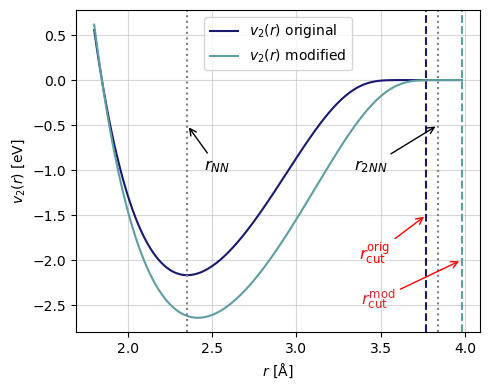

In [81]:
# Cutoff values
a_original = 1.8
a_modified = 1.9  # new cutoff value

# Define v2 as a function of cutoff
def v2(r, a_cut):
    r_red = r / sigma
    if r >= a_cut * sigma:
        return 0.0
    return epsilon * A * (B * r_red**(-p) - r_red**(-q)) * np.exp(1 / (r_red - a_cut))

# Distance values
r_vals = np.linspace(1.8, a_modified * sigma - 1e-4, 500)
v2_vals_orig = [v2(r, a_original) for r in r_vals]
v2_vals_mod = [v2(r, a_modified) for r in r_vals]

# Important distances
r_NN = 2.3517
r_2NN = 3.84
r_cut_orig = a_original * sigma
r_cut_mod = a_modified * sigma

# Plot
plt.figure(figsize=(5, 4))
plt.plot(r_vals, v2_vals_orig, color='midnightblue', label=r'$v_2(r)$ original')
plt.plot(r_vals, v2_vals_mod, color='cadetblue', lw=1.5, label=r'$v_2(r)$ modified')

# Vertical lines
plt.axvline(x=r_NN, color='gray', linestyle=':')
plt.axvline(x=r_2NN, color='gray', linestyle=':')
plt.axvline(x=r_cut_orig, color='midnightblue', linestyle='--')
plt.axvline(x=r_cut_mod, color='cadetblue', linestyle='--')

# Annotations
plt.annotate(r'$r_{NN}$', xy=(r_NN, -0.5), xytext=(r_NN + 0.1, -1),
             arrowprops=dict(arrowstyle='->'), fontsize=12)
plt.annotate(r'$r_{2NN}$', xy=(r_2NN, -0.5), xytext=(r_2NN - 0.5, -1),
             arrowprops=dict(arrowstyle='->'), fontsize=12)
plt.annotate(fr'$r^{{\mathrm{{orig}}}}_{{\mathrm{{cut}}}}$', 
             xy=(r_cut_orig, -1.5), xytext=(r_cut_orig - 0.4, -2),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='red')
plt.annotate(fr'$r^{{\mathrm{{mod}}}}_{{\mathrm{{cut}}}}$', 
             xy=(r_cut_mod, -2), xytext=(r_cut_mod - 0.6, -2.5),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, color='tab:red')

# Axes
plt.xlabel(r'$r\ \mathrm{[\AA]}$')
plt.ylabel(r'$v_2(r)\ \mathrm{[eV]}$')
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### How does the curve change?

The pair potential $v_2(r)$ includes a **cutoff function** via the exponential:

$$
v_2(r) = \varepsilon A \left( B r^{-p} - r^{-q} \right) \exp\left[\frac{1}{r/\sigma - a} \right]
\quad \text{for } r/\sigma < a
$$

* Increasing $a$ makes the **exponential decay slower**, thus:

  * **Flattens the tail**
  * Allows weak interactions from further neighbors (like 2nd shell)
* But also changes the **shape and curvature** of the potential well slightly

So the curve becomes:

* **Broader**
* **Less steep near the cutoff**
* With **nonzero tail** reaching 3.84 Å

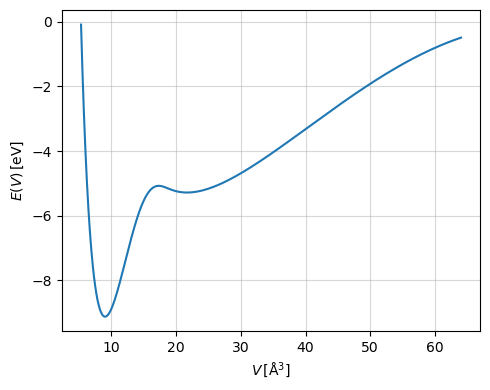

In [83]:
a_modified = 1.9  # dimensionless cutoff


# Energy per atom as function of lattice parameter a0
def energy_per_atom(a0):
    r_NN = (np.sqrt(3) / 4) * a0
    r_2NN = a0 / np.sqrt(2)

    v_NN = v2_modified(r_NN)
    v_2NN = v2_modified(r_2NN)

    z1 = 4   # number of 1st neighbors in diamond cubic
    z2 = 12  # number of 2nd neighbors

    return 0.5 * (z1 * v_NN + z2 * v_2NN)

# Volume per atom
def volume_per_atom(a0):
    return a0**3 / 8

# Sweep over a0 values
a0_vals = np.linspace(3.5, 8.0, 300)
volumes = [volume_per_atom(a0) for a0 in a0_vals]
energies = [energy_per_atom(a0) for a0 in a0_vals]

# Plot E(V)
plt.figure(figsize=(5, 4))
plt.plot(volumes, energies)
plt.xlabel(r'$V\,\mathrm{[\AA^3]}$')
plt.ylabel(r'$E(V)\,\mathrm{[eV]}$')

plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()